Para entregar:
Ejercicio 2 completo, 3 completo y 4 (opcional)

No hay que quedarse con un unico mensaje, nuestro sistema debe poder recibirlos todos, porque desconocemos el mensaje real.

Ejemplo Apuestas de Kelly.

Tengo que apostar todo en dos opciones, o pasa una u otra (cara/ceca, river/boke). Puedo apostar por ambos.
Cara paga x3, ceca x1.2 Cual es la proporcion optima para distribuir mis apuestas?

# Ejercicio 2

In [68]:
from collections import Counter
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales.

Usamos b=0.5 y calculamos esperanza en 10 juegos.

In [1]:
GANANCIA_CARA = 3
GANANCIA_CECA = 1.2

In [55]:
#Wealth para 1 paso
def w_bd(w0,b,d):
    """Wealth obtenido en funcion de w0, el wealth inicial; b, proporcion apostada 
    a cara; y d, el dato de si es cara (d=1) o ceca (d=0)"""
    if d==1:
        return w0*b*GANANCIA_CARA
    else:
        return w0*(1-b)*GANANCIA_CECA
    
def w_eventos(w0,b,eventos):
    for evento in eventos:
        w0 = w_bd(w0,b,evento)
    return w0

#Posibles resultados dado N eventos
def posibles_resultados(N):
    posibilidades = [[0],[1]]
    resultados :list[list[int]] = posibilidades.copy()
    for i in range(N-1):
        resultados = [k+j for k in resultados for j in posibilidades]
    return resultados

def probabilidad_dato(dato):
    return 0.5**(len(dato))

def esperanza(w0,b,N):
    posibilidades = posibles_resultados(N)
    sum = 0
    for eventos in posibilidades:
        sum += w_eventos(w0,b,eventos) * probabilidad_dato(eventos)
    return sum

esperanzas = []
for i in range(3):
    esperanzas.append(esperanza(1,0.5,i+1))
esperanzas



[1.05, 1.1025, 1.157625]

In [57]:
esperanzas[1]/esperanzas[0],esperanzas[2]/esperanzas[1]

(1.05, 1.0499999999999998)

La tasa de crecimiento entre paso y paso es 1.05
Es decir, la esperanza al paso T es 1.05**T

## 2.2 Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.

In [59]:
def simular_jugada(N_eventos):
    resultados = []
    for i in range(N_eventos):
        resultados.append(rd.choice([0,1]))
    return resultados

def simular_jugadas(N_jugadores,N_eventos):
    return [simular_jugada(N_eventos) for i in range(N_jugadores)]


jugadas = simular_jugadas(10000,10)
plata_ronda_10 = [w_eventos(1,0.5,eventos) for eventos in jugadas]
sum(plata_ronda_10)/len(plata_ronda_10)

1.620531798266773

## 2.3 Distribuir tu creencia entre conviene o no conviene participar de esta apuesta (el tiempo que quieras).

In [67]:
esperanza(1,1,20)

3325.256730079651

Si hago all in a cara, la esperanza me dice que me hago millonario. Por las dudas meto un 0.8 de cagon nomas

## 2.4 Elegir una apuesta y graficar c´omo se actualizan los recursos en el tiempo.

Elijo b=0.8
Pocas personas, muchos pasos

[1, 0.6, 0.54, 0.729, 1.476225, 1.7936133749999998, 3.268860375937499, 8.936247052719137, 36.64419807055642, 90.15846882784523, 332.73546411346456, 736.7886157663487, 2447.2479921967756, 4877.129700828925, 14579.475105027512, 65374.85387214217, 175885.81844061703, 709810.1019628027, 4296796.512493263, 39015632.953210175, 212561094.33811682, 1737081346.8694575, 21293536442.10642, 156612594463.1614, 1727813377395.2148, 28592902224808.695, 709758995097591.9, 2.642742386700731e+16, 5.904049716062586e+17, 1.9785017577851822e+19, 9.945214032266704e+20, 7.49865005869256e+22, 8.48092648186789e+24, 5.75512499672952e+26, 5.858109452804636e+28, 3.5777620517928673e+30, 3.277605531880454e+32, 1.8015783946106812e+34, 5.941565597857396e+35, 1.175709095732288e+37, 1.3958865100667474e+38, 2.4859454894827157e+39, 6.64086041248148e+40, 1.064408544868947e+42, 1.0236314092016967e+43, 1.4766246479634305e+44, 3.195125215052135e+45, 1.0370433495684246e+47, 2.0195619949120807e+48, 5.899411996119488e+49, 2.5849

/tmp/ipykernel_4322/1387981861.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(apostadores).T)


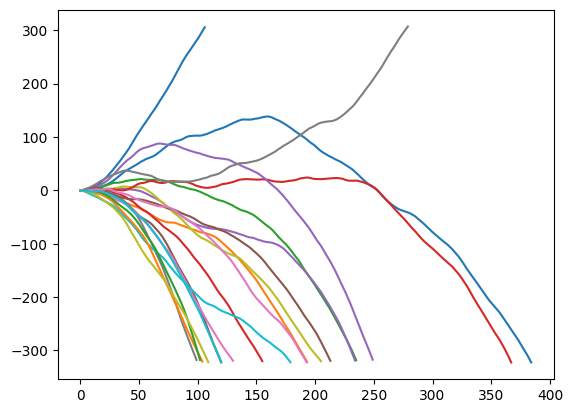

In [97]:
apuesta = 0.5
apostadores = []
tiradas = 1000
N_apostadores = 20
for i in range(N_apostadores):
    apostador = [1]
    eventos = []
    for j in range(tiradas):
        eventos.append(rd.choice([0,1]))
        apostador.append(w_eventos(apostador[j],apuesta,eventos))
    apostadores.append(apostador.copy())
    print(apostador)
    print(eventos)
apostadores = np.array(apostadores)
plt.plot(np.log10(apostadores).T)

    


## 2.5 Graficar la tasa de crecimiento temporal (l´ımT →∞) de los recursos para cada apuesta alternativa b.

In [ ]:
filas,columnas = 4,3
total = filas*columnas
bs = np.linspace(0,1,total)
fig,ax = plt.subplots(4,3)
data = []
for idx,b in enumerate(bs):
    apuesta = b
    apostadores = []
    tiradas = 100
    N_apostadores = 20
    for i in range(N_apostadores):
        apostador = [1]
        eventos = []
        for j in range(tiradas):
            eventos.append(rd.choice([0,1]))
            apostador.append(w_eventos(apostador[j],apuesta,eventos))
        apostadores.append(apostador.copy())
        # print(apostador)
        # print(eventos)
    apostadores = np.array(apostadores)
    data.append(apostadores)


/tmp/ipykernel_4322/3290239335.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data[i]).T)


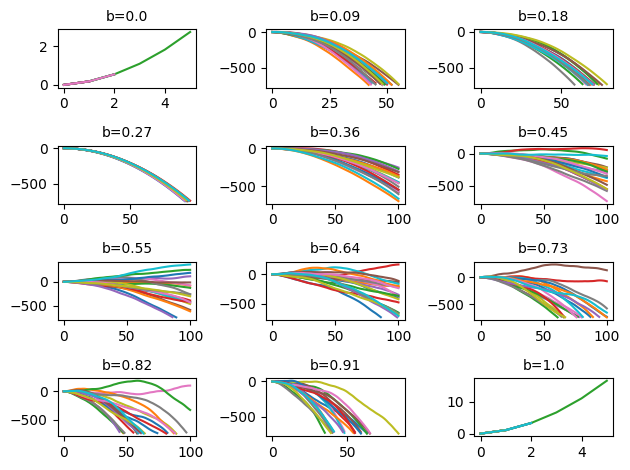

In [114]:
for i in range(len(data)):
    plt.subplot(filas,columnas,i+1)
    plt.plot(np.log(data[i]).T)
    plt.title(label=f"b={round(bs[i],2)}").set_fontsize(10)
    plt.tight_layout()

En realidad este era analitico:

w_t(b) = r(b)^T
w_t(b)^(1/t) = r(b)

lim t-> inf w_t(b)^(1/t) = lim w0 (bQc)^(n_c/T) ((1-b)Qs)^(n_s/T)
n_c/T -> p_c  y n_s/T -> (1-p_c)


Queremos comparar b!!!

BayesFactor, comparo las tasas de crecimiento dependientes de la apuesta que hagas

r(b)/r(d) con b!=d

$$\frac{r(b)}{r(d)} = \frac{\omega_0 (b Q_c)^P ((1-b)Q_s)^{1-P}}{\omega_0 (d Q_c)^P ((1-d)Q_s)^{1-P}} = \frac{(b)^P ((1-b))^{1-P}}{(d)^P ((1-d))^{1-P}}$$

NO DEPENDE DE LO QUE TE OFREZCA LA CASA DE APUESTAS!!!!
Lo hago con log

$$log(b^P (1-b)^{1-P}) = p log(b) + (1-p) log(1-b)$$

Es la entropia cruzada!! Minimizo cuando p=b!!!!!!!

el r(b) es la media geometrica!!!



Calcular r(b) para cada tirada y graficar como cambia!!!!